In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# Apply metrics
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, roc_auc_score
)
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# load dataset
df = pd.read_csv('data/normalized-data-crop-recommendation.csv')

# split the dataframe into features (x) and labels (y)
x = df.drop(columns = ['label'])
y = df['label']

In [62]:
# split the data to 90-10 where 90% is for training and testing while the remaining 10% is for unseen data
x_train_test, x_unseen, y_train_test, y_unseen = train_test_split(x, y, test_size = 0.10, random_state = 42)

# split the train_test to 80-20 where 80% is for training while the 20% is for testing
x_train, x_test, y_train, y_test = train_test_split(x_train_test, y_train_test, test_size = 0.20, random_state = 42)

In [76]:
#Import svm model
from sklearn import svm

# instance a model
# poly for non-linearly separable data 
# decision_function_shape=ovr one-versus-rest, when creating a model with multiclass
model = svm.SVC(kernel='poly', degree=3, C=1.0, gamma='scale', decision_function_shape='ovr', probability=True)
model.fit(x_train, y_train)

SVC(kernel='poly', probability=True)

In [84]:
# Perform 10-Fold Cross Validation using the unseen dataset
from sklearn.model_selection import cross_val_predict
y_unseen_predicted = cross_val_predict(model, x_unseen, y_unseen, cv=10)
y_unseen_predicted_probability = cross_val_predict(model, x_unseen, y_unseen, cv=10, method='predict_proba')

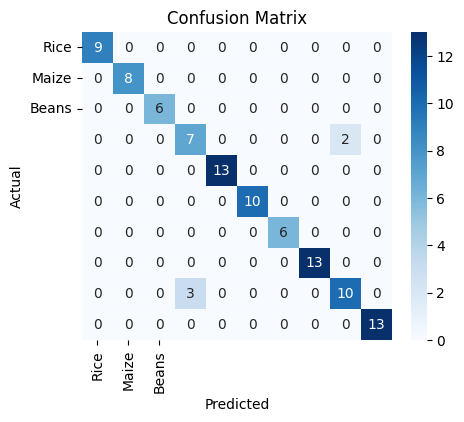

In [85]:
# (a) Confusion Matrix
cm = confusion_matrix(y_unseen, y_unseen_predicted)

# Visualizing Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=['Rice', 'Maize', 'Beans'], yticklabels=['Rice', 'Maize', 'Beans'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [86]:
# Accuracy Score
accuracy = accuracy_score(y_unseen, y_unseen_predicted)
print("Accuracy:", accuracy)

Accuracy: 0.95


In [87]:
# Precision (for each class)
precision = precision_score(y_unseen, y_unseen_predicted, average='macro')  # 'macro' averages across all classes
print("Precision:", precision)

Precision: 0.9533333333333334


In [88]:
# Recall (for each class)
recall = recall_score(y_unseen, y_unseen_predicted, average='macro')
print("Recall:", recall)

Recall: 0.9547008547008546


In [89]:
# ROC-AUC Score (Only works with probability outputs)
y_unseen_binarized = label_binarize(y_unseen, classes=np.unique(y_unseen))  # Convert labels to one-hot for ROC-AUC
roc_auc = roc_auc_score(y_unseen_binarized, y_unseen_predicted_probability, multi_class='ovr');
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9968506589196245
